In [3]:
!pip install fredapi==0.5.1


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.express as px
import time

plt.style.use('fivethirtyeight') #allows us to import a style for our charts
pd.set_option('max_columns', 500) #see up to 500 columns
colour_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred #contains economic data

fred_key ='e813f73ecbe30dc4ad4cb54c6b1488a6'

### 1. Create the Fred Object

In [5]:
fred = Fred(api_key=fred_key)

### 2. Search for economic data

In [6]:
sp_search = fred.search('S&P', order_by ='popularity')
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-28,2023-09-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-09-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-28 08:49:14-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-09-28,2023-09-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-09-28,2023-09-28,S&P 500,2013-09-30,2023-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-27 19:11:01-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-09-28,2023-09-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-09-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-28 08:48:02-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-09-28,2023-09-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-09-28,2023-09-28,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01JOA156NWDB,DDEM01JOA156NWDB,2023-09-28,2023-09-28,Stock Market Turnover Ratio (Value Traded/Capi...,2007-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...
DDEM01PGA156NWDB,DDEM01PGA156NWDB,2023-09-28,2023-09-28,Stock Market Turnover Ratio (Value Traded/Capi...,2003-01-01,2017-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...


In [7]:
sp_search.shape

(1000, 15)

### 3. Pull raw data

In [8]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot: title={'center': 'S&P 500'}>

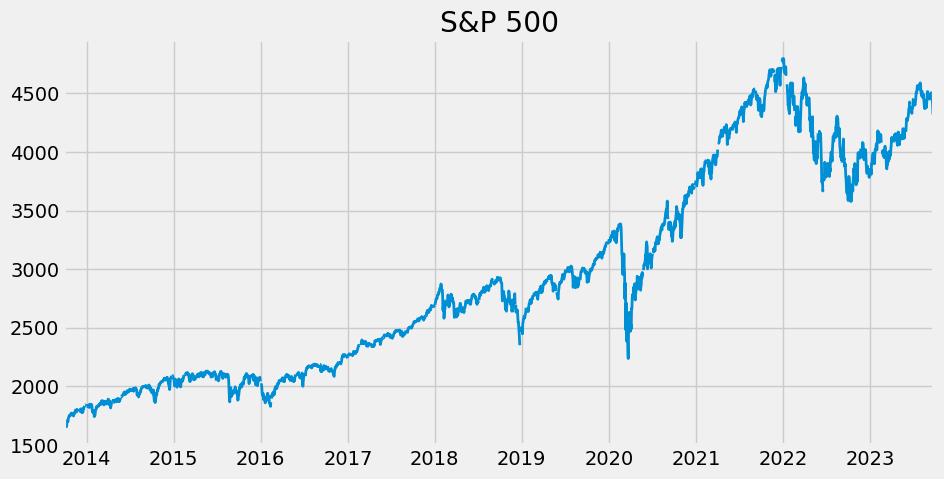

In [9]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

### 4. Pull and Join Multiple Data Series

In [10]:
unemployment_results = fred.search('unemployment')
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-28,2023-09-28,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,56,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-09-28,2023-09-28,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-09-28,2023-09-28,Continued Claims (Insured Unemployment),1967-01-07,2023-09-16,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-09-28 07:33:05-05:00,72,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-09-28,2023-09-28,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,65,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMUNRRTTPLA156N,LMUNRRTTPLA156N,2023-09-28,2023-09-28,Other Labor Market Measures: Registered Unempl...,1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-03-15 13:32:52-05:00,1,OECD Descriptor ID: LMUNRRTT OECD unit ID: PC ...
LNU03023558,LNU03023558,2023-09-28,2023-09-28,Reentrants to Labor Force as a Percent of Tota...,1967-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:46:58-05:00,1,The series comes from the 'Current Population ...
LRUN64TTFRQ156N,LRUN64TTFRQ156N,2023-09-28,2023-09-28,Unemployment Rate: Aged 15-64: All Persons for...,1999-01-01,2023-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 16:41:32-05:00,1,OECD Descriptor ID: LRUN64TT OECD unit ID: PC ...


In [11]:
unrate = fred.get_series('UNRATE')

In [12]:
#unrate.plot()

In [13]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [14]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [15]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')] #locate where that is true

In [16]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', 'LNS14000002', 'NYUR', 'U2RATE',
       ...
       'LNS14000025', 'CPACUR', 'LNS14000315', 'LNS14000048', 'LNS14000091',
       'LNS14000015', 'CESCUR', 'CWSCUR', 'CWNCUR', 'LNS14200000'],
      dtype='object', name='series id', length=106)

In [17]:
all_results= []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)

In [18]:
all_results

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2023-04-01     3.4
 2023-05-01     3.7
 2023-06-01     3.6
 2023-07-01     3.5
 2023-08-01     3.8
 
 [908 rows x 1 columns],
             LNS14000006
 1972-01-01         11.2
 1972-02-01         11.2
 1972-03-01         10.7
 1972-04-01          9.8
 1972-05-01         10.2
 ...                 ...
 2023-04-01          4.7
 2023-05-01          5.6
 2023-06-01          6.0
 2023-07-01          5.8
 2023-08-01          5.3
 
 [620 rows x 1 columns],
             CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.1
 1976-05-01   9.0
 ...          ...
 2023-04-01   4.5
 2023-05-01   4.5
 2023-06-01   4.6
 2023-07-01   4.6
 2023-08-01   4.6
 
 [572 rows x 1 columns],
             M0892AUSM156SNBR
 1929-04-01              0.69
 1929-05-01              1.65
 1929-06-01              2.06
 1929-07-01              0.79
 1929-08-01  

In [19]:
unemp_results = pd.concat(all_results, axis=1)

In [20]:
unemp_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,TXUR,FLUR,LNS14000002,NYUR,U2RATE,LNS14000024,LNS14000031,OHUR,LNS14000009,LNS14024887,LNS14000003,LNS14000001,MIUR,PAUR,MAUR,COUR,LNS14027660,ALUR,ILUR,LRUN64TTUSM156S,NJUR,LNS14027662,MNUR,TNUR,NMUR,GAUR,LNS14032183,KYUR,MDUR,VAUR,AZUR,INUR,NCUR,ORUR,LNS14000012,SCUR,MOUR,WIUR,WAUR,WVUR,ARUR,LNS14000036,LNS14000060,UTUR,LNS14000018,NVUR,IAUR,LAUR,DCUR,LNS14027659,AKUR,OKUR,LASMT261982000000003,KSUR,PRUR,LASMT391746000000003,LNS14000028,NDUR,HIUR,CTUR,MSUR,CMWRUR,NEUR,LNS14000089,MEUR,IDUR,MTUR,NHUR,CNEWUR,LNS14024230,LNS14000032,DEUR,SDUR,WYUR,RIUR,CNERUR,LRUN24TTUSM156S,LNS14000029,CSOUUR,VTUR,LRUN25TTUSM156S,LNS14000150,LNS14027689,CWSTUR,CENCUR,CMTNUR,LNS14000026,LRUNTTTTUSM156S,CSATUR,USAURAMS,LNS14024885,LNS14000025,CPACUR,LNS14000315,LNS14000048,LNS14000091,LNS14000015,CESCUR,CWSCUR,CWNCUR,LNS14200000
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,3.4,4.7,4.5,NaN,NaN,4.0,2.6,3.3,4.0,1.6,3.2,4.5,3.7,4.4,6.5,3.1,3.5,3.8,4.1,3.1,2.8,3.9,2.2,4.2,3.461515,3.5,1.9,2.8,3.3,3.5,3.1,2.8,3.7,2.5,3.1,3.4,3.0,3.4,4.0,9.2,3.1,2.5,2.4,4.3,3.3,2.8,5.4,3.1,2.3,12.9,5.4,2.7,3.6,5.0,5.4,3.7,2.9,3.2,2.9,6.0,3.9,2.9,2.1,3.3,3.8,3.4,3.3,2.0,3.8,2.4,2.6,2.3,2.1,3.2,2.3,4.4,4.3,1.9,3.5,3.0,3.7,6.5,2.8,3.3,2.4,3.1,1.7,2.9,4.0,3.6,3.2,3.1,3.4,3.0,NaN,6.9,3.3,4.4,2.0,2.9,2.9,8.7,3.1,3.8,2.6,3.6
2023-05-01,3.7,5.6,4.5,NaN,NaN,4.1,2.6,3.6,3.9,1.8,3.4,5.6,3.6,4.0,7.4,

In [21]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [22]:
unemp_states = unemp_results.copy()  #.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [23]:
unemp_states

,California,Texas,Florida,New York,Ohio,Michigan,Pennsylvania,Massachusetts,Colorado,Alabama,Illinois,New Jersey,Minnesota,Tennessee,New Mexico,Georgia,Kentucky,Maryland,Virginia,Arizona,Indiana,North Carolina,Oregon,South Carolina,Missouri,Wisconsin,Washington,West Virginia,Arkansas,Utah,Nevada,Iowa,Louisiana,the District of Columbia,Alaska,Oklahoma,Kansas,Puerto Rico,North Dakota,Hawaii,Connecticut,Mississippi,Nebraska,Maine,Idaho,Montana,New Hampshire,Delaware,South Dakota,Wyoming,Rhode Island,Vermont
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,8.0,10.5,5.8,6.6,6.6,10.3,6.0,6.0,8.6,8.4,5.6,6.4,6.1,10.2,6.6,6.4,9.5,7.4,5.9,5.8,8.5,7.5,7.3,5.8,9.2,4.3,6.3,8.7,7.1,5.8,4.2,19.6,3.4,9.8,9.8,6.7,3.3,8.7,5.6,5.8,6.5,8.0,3.3,4.1,7.8,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,8.1,10.5,5.7,6.6,6.6,10.3,6.0,6.0,8.7,8.4,5.6,6.4,6.1,10.2,6.6,6.4,9.5,7.4,5.9,5.8,8.5,7.5,7.3,5.9,9.2,4.3,6.3,8.7,7.1,5.8,4.2,19.5,3.4,9.8,9.8,6.7,3.3,8.7,5.6,5.8,6.5,8.0,3.3,4.1,7.8,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,8.1,10.5,5.7,6.6,6.6,10.3,5.9,6.0,8.7,8.4,5.6,6.4,6.1,10.1,6.5,6.4,9.4,7.3,5.9,5.7,8.4,7.5,7.3,5.8,9.2,4.3,6.3,8.6,7.0,5.8,4.2,19.3,3.4,9.8,9.8,6.6,3.3,8.6,5.6,5.8,6.5,8.0,3.2,4.1,7.7,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,8.1,10.3,5.6,6.5,6.6,10.3,5.8,6.0,8.6,8.3,5.6,6.4,6.0,10.0,6.3,6.3,9.2,7.2,6.0,5.6,8.5,7.5,7.2,5.8,9.0,4.2,6.4,8.5,6.9,5.8,4.2,19.0,3.5,9.7,9.6,6.4,3.2,8.6,5.6,5.8,6.5,8.1,3.1,4.0,7.7,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,8.1,10.1,5.6,6.4,6.6,10.3,5.7,5.9,8.6,8.1,5.5,6.5,5.9,9.8,6.0,6.1,9.1,7.0,6.0,5.5,8.5,7.4,7.1,5.7,8.9,4.1,6.5,8.4,6.9,5.7,4.2,18.9,3.6,9.4,9.4,6.3,3.1,8.5,5.6,5.8,6.5,8.3,3.1,3.9,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,4.5,4.0,2.6,4.0,3.7,3.8,4.1,3.1,2.8,2.2,4.2,3.5,2.8,3.3,3.5,3.1,3.7,2.5,3.1,3.4,3.0,3.4,4.0,3.1,2.5,2.4,4.3,3.3,2.8,2.3,5.4,2.7,3.6,5.0,3.7,2.9,2.9,6.0,2.1,3.3,3.8,3.4,2.0,2.4,2.6,2.3,2.1,4.3,1.9,3.5,3.0,2.4
2023-05-01,4.5,4.1,2.6,3.9,3.6,3.7,4.0,2.8,2.8,2.2,4.1,3.6,2.9,3.3,3.5,3.2,3.8,2.4,2.9,3.4,3.1,3.4,3.7,3.1,2.5,2.4,4.1,3.3,2.7,2.3,5.4,2.7,3.6,5.1,3.6,2.8,2.9,6.1,2.1,3.1,3.7,3.2,1.9,2.4,2.6,2.3,1.9,4.2,1.9,3.3,3.0,2.1
2023-06-01,4.6,4.1,2.6,3.9,3.4,3.6,3.8,2.6,2.8,2.2,4.0,3.7,2.9,3.2,3.5,3.2,3.8,2.0,2.7,3.5,3.2,3.3,3.5,3.1,2.6,2.5,3.8,3.3,2.6,2.4,5.4,2.7,3.6,5.1,3.7,2.7,2.8,6.1,2.0,3.0,3.7,3.1,1.9,2.4,2.7,2.4,1.8,4.2,1.8,3.1,2.9,1.9
2023-07-01,4.6,4.1,2.7,3.9,3.3,3.6,3.5,2.5,2.9,2.1,4.0,3.9,3.0,3.1,3.6,3.2,3.9,1.8,2.5,3.6,3.3,3.3,3.4,3.1,2.7,2.6,3.6,3.4,2.6,2.4,5.3,2.7,3.4,5.0,3.8,2.7,2.7,6.2,2.0,2.8,3.6,3.0,2.0,2.4,2.8,2.5,1.7,4.1,1.9,3.0,2.8,1.8


In [24]:
#plot states unemployment rates
px.line(unemp_states)

### Pull August 2023 Unemployment Rate Per State

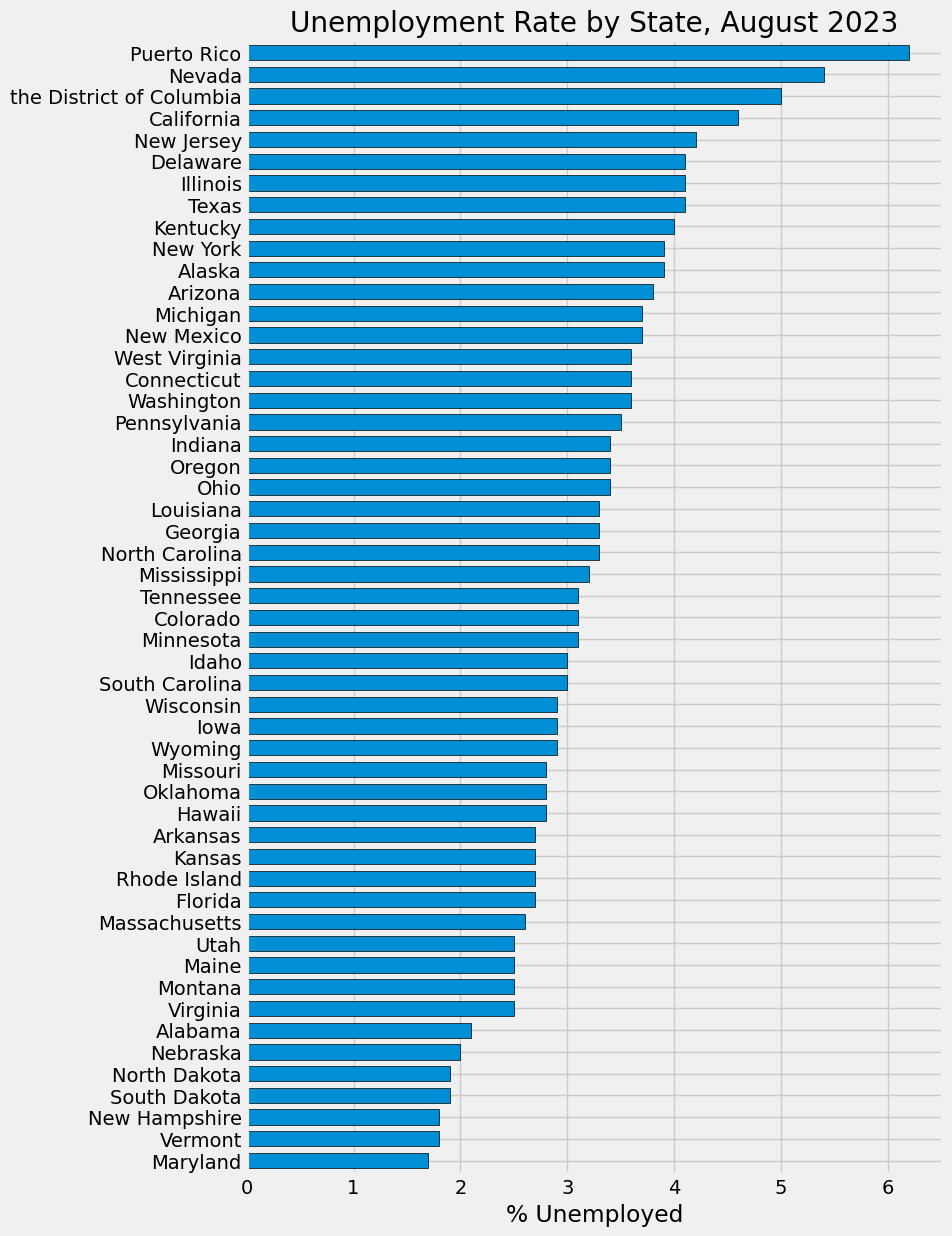

In [25]:
ax = unemp_states.loc[unemp_states.index == '2023-08-01'].T.sort_values('2023-08-01').plot(kind='barh', width=0.7, edgecolor='black', figsize=(8,14), title='Unemployment Rate by State, August 2023')

ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

### Pull Participation Rate

In [26]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [27]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-09-28,2023-09-28,Labor Force Participation Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:21-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-09-28,2023-09-28,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,67,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-09-28,2023-09-28,Labor Force Participation Rate - Women,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,64,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-09-28,2023-09-28,Labor Force Participation Rate - Men,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:34-05:00,57,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-09-28,2023-09-28,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:34-05:00,50,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRINTTFEUSM156S,LRINTTFEUSM156S,2023-09-28,2023-09-28,Inactivity Rate: Aged 15 and over: Females for...,1975-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:59:21-05:00,1,OECD Descriptor ID: LRINTTFE OECD unit ID: PC ...
LRIN74TTUSM156S,LRIN74TTUSM156S,2023-09-28,2023-09-28,Inactivity Rate: Aged 15-74: All Persons for U...,1981-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 16:20:12-05:00,0,OECD Descriptor ID: LRIN74TT OECD unit ID: PC ...
LRACTTTTUSM156S,LRACTTTTUSM156S,2023-09-28,2023-09-28,Activity Rate: Aged 15 and over: All Persons f...,1960-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:59:34-05:00,1,OECD Descriptor ID: LRACTTTT OECD unit ID: PC ...


In [28]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) 
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [29]:
us_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

# Filter DataFrame columns based on the list of US states
part_states = part_states[[col for col in part_states.columns if any(state in col for state in us_states)]]


In [30]:
unemp_states.columns

Index(['California', 'Texas', 'Florida', 'New York', 'Ohio', 'Michigan',
       'Pennsylvania', 'Massachusetts', 'Colorado', 'Alabama', 'Illinois',
       'New Jersey', 'Minnesota', 'Tennessee', 'New Mexico', 'Georgia',
       'Kentucky', 'Maryland', 'Virginia', 'Arizona', 'Indiana',
       'North Carolina', 'Oregon', 'South Carolina', 'Missouri', 'Wisconsin',
       'Washington', 'West Virginia', 'Arkansas', 'Utah', 'Nevada', 'Iowa',
       'Louisiana', 'the District of Columbia', 'Alaska', 'Oklahoma', 'Kansas',
       'Puerto Rico', 'North Dakota', 'Hawaii', 'Connecticut', 'Mississippi',
       'Nebraska', 'Maine', 'Idaho', 'Montana', 'New Hampshire', 'Delaware',
       'South Dakota', 'Wyoming', 'Rhode Island', 'Vermont'],
      dtype='object')

In [31]:
part_states.columns

Index(['Alabama', 'Kentucky', 'California', 'Wisconsin', 'Florida',
       'Minnesota', 'Maryland', 'Tennessee', 'Michigan', 'Virginia', 'Maine',
       'Texas', 'New York', 'Ohio', 'Georgia', 'Iowa', 'Massachusetts', 'Utah',
       'Pennsylvania', 'Indiana', 'Mississippi', 'Louisiana', 'Oklahoma',
       'Arizona', 'New Mexico', 'Colorado', 'Alaska', 'West Virginia',
       'North Carolina', 'Illinois', 'Hawaii', 'Washington', 'Nebraska',
       'New Hampshire', 'South Carolina', 'Idaho', 'Oregon', 'Connecticut',
       'North Dakota', 'New Jersey', 'Arkansas', 'Missouri', 'Nevada',
       'Vermont', 'Montana', 'Kansas', 'South Dakota', 'Delaware', 'Wyoming',
       'Rhode Island'],
      dtype='object')

In [32]:
part_states.shape

(908, 50)

### Plot Unemployment vs. Participation

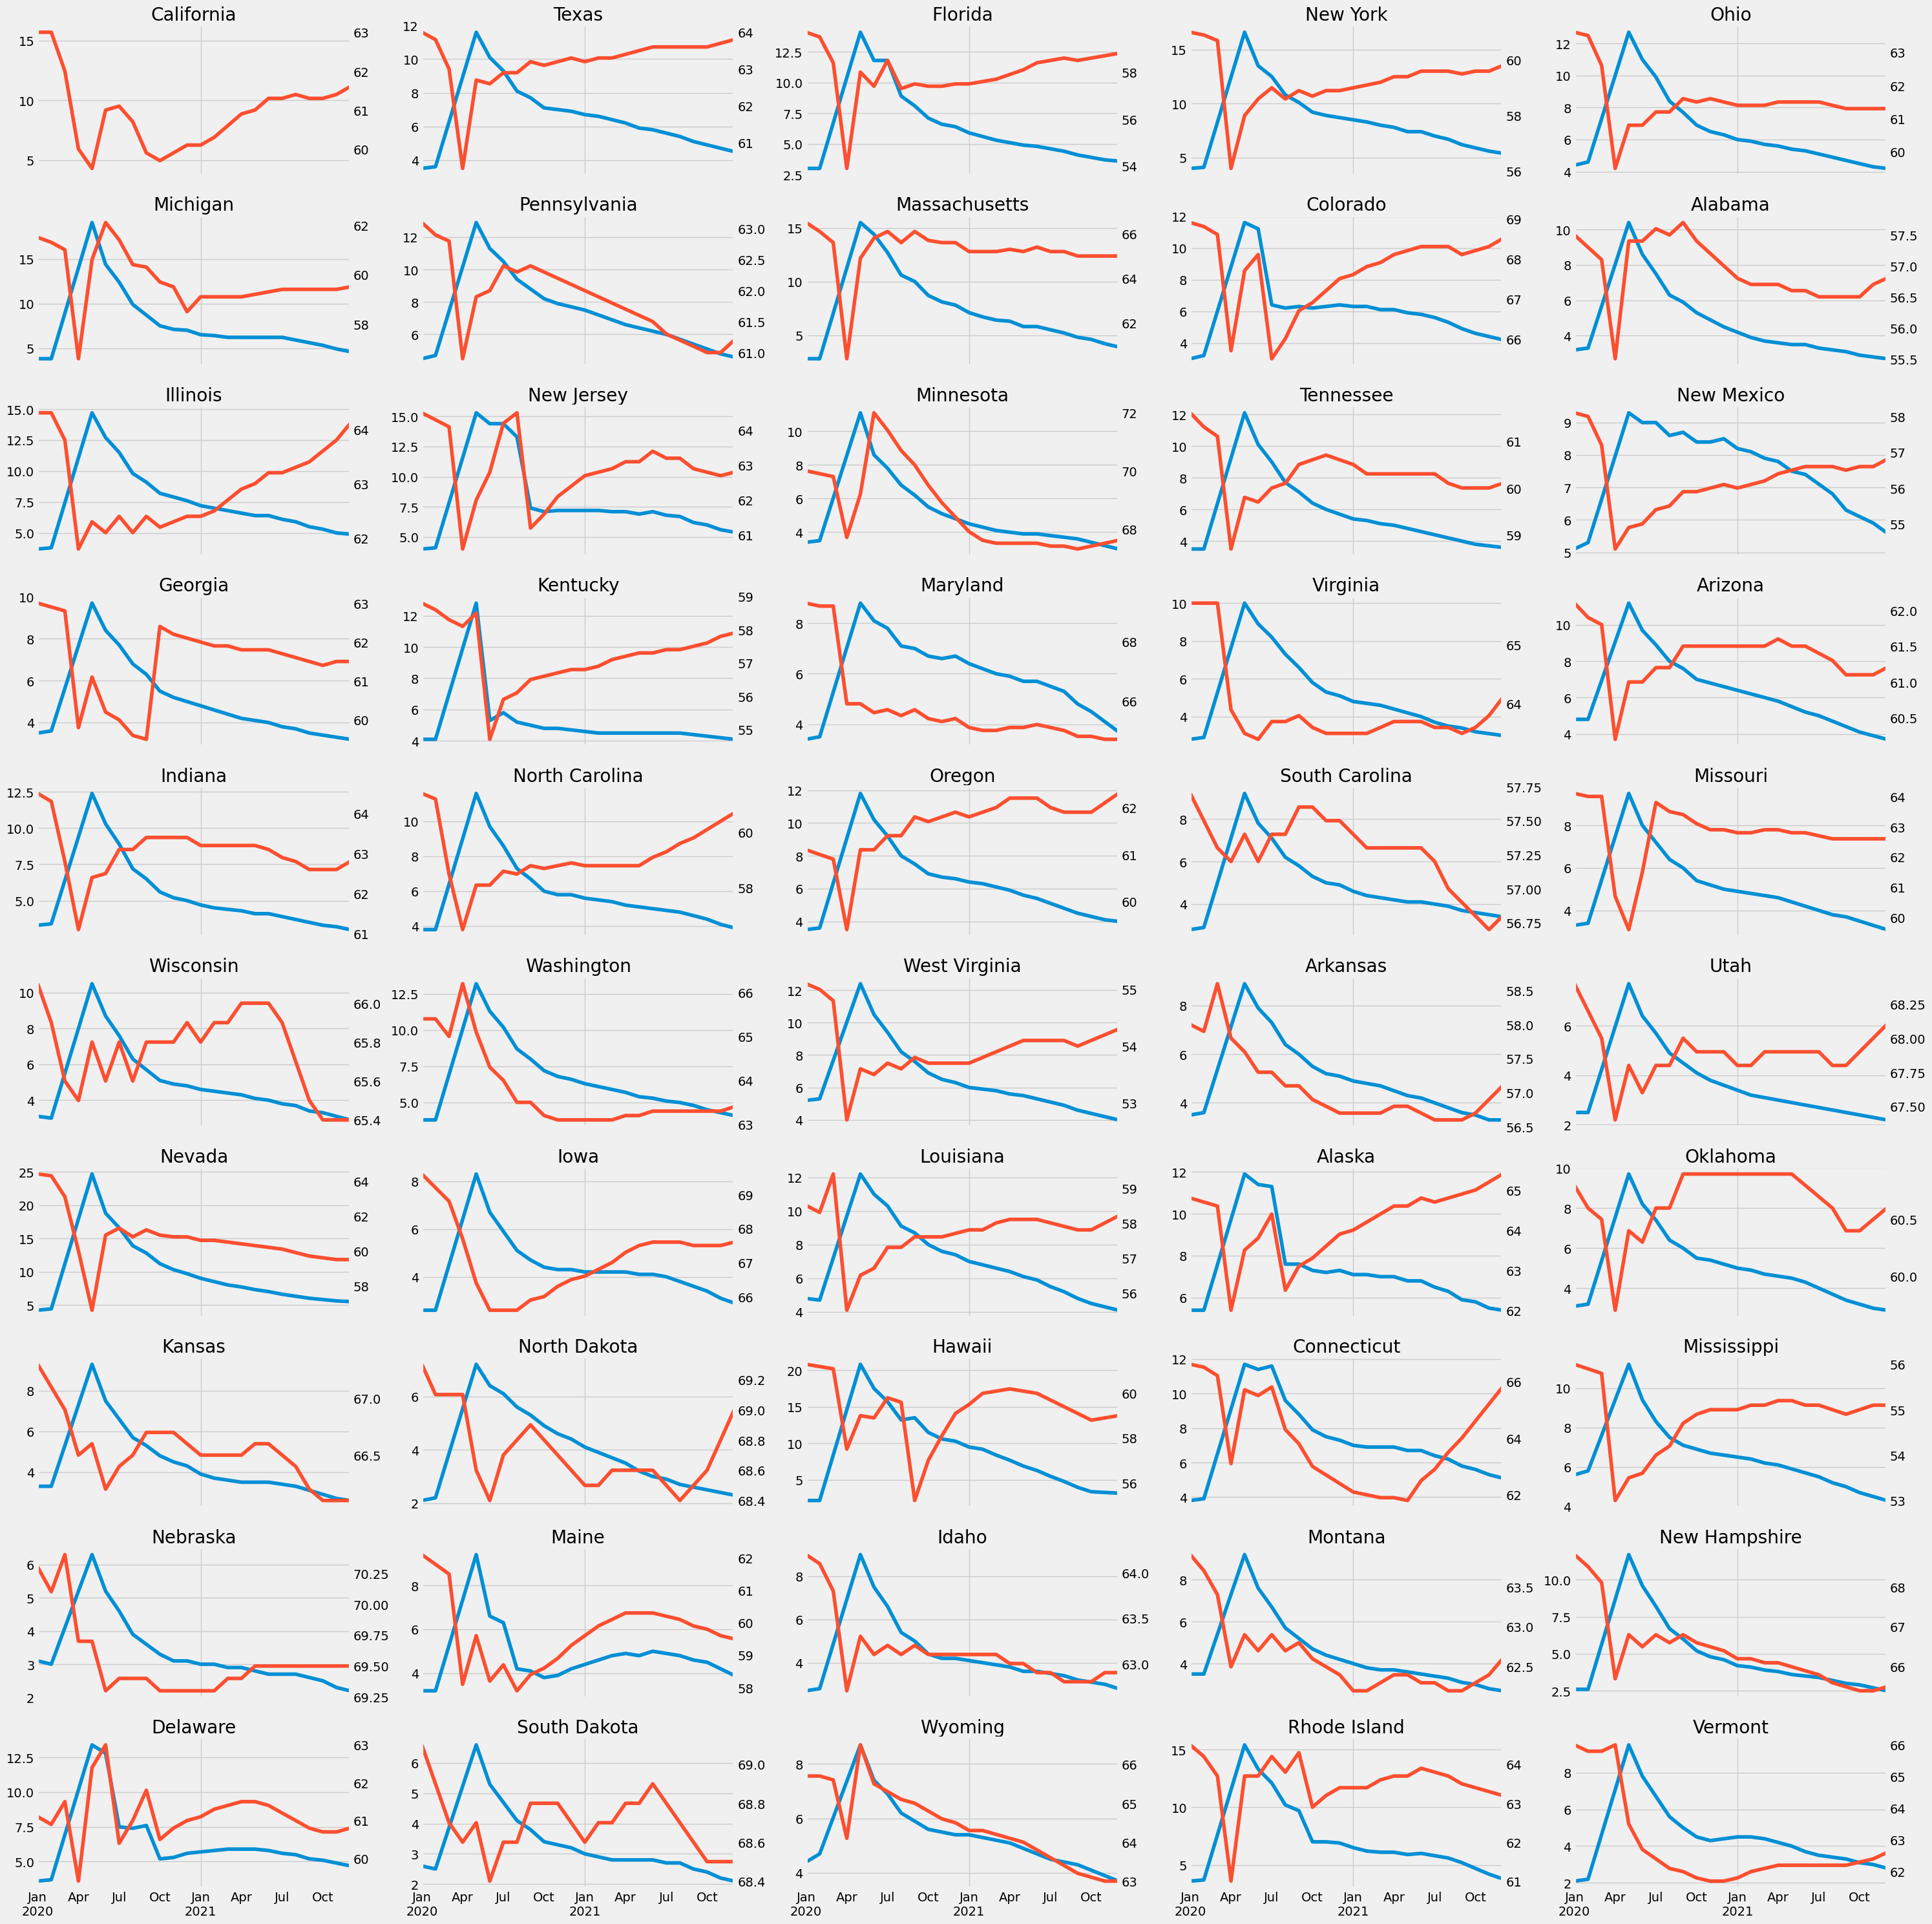

In [36]:
# Fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=colour_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

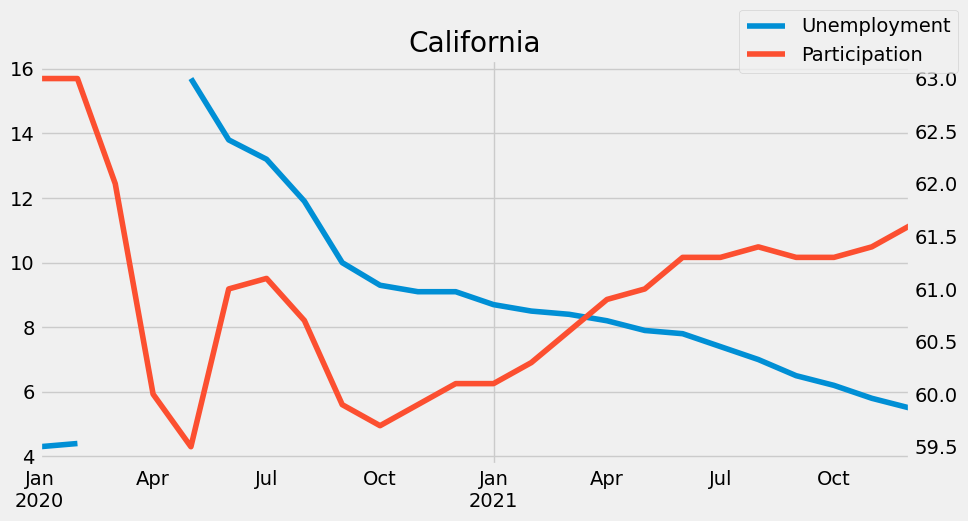

In [34]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=colour_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf3a6294-4be5-4439-ace0-eb86e13f9e93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>